In [ ]:
'''
Documentation:
Topic: KNN-Algorithm - To train a K Nearest Neighbor (KNN) model to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1
Methodology:
1.   - Load the data
2.   - Initialize K to your chosen number of neighbors
3.   - For each example in the data
3.1  - Calculate the distance between the query example and the current example from the data.
3.2  - Add the distance and the index of the example to an ordered collection
4.   - Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5.   - Pick the first K entries from the sorted collection
6.   - Get the labels of the selected K entries
7.   - If regression, return the mean of the K labels
8.   - If classification, return the mode of the K labels
'''

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#loading the dataset
df=pd.read_csv('diabetes.csv') #reads the csv file
col_names=df.columns.tolist()
print(col_names)
df.head()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Assign data from first 8 columns to X variable
X=df.iloc[:, :-1].values
# Assign data from last column to y variable ('Outcome') 
y=df.iloc[:,-1].values

In [4]:
# create training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# perform feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [7]:
#Evaluating the Algorithm:
predictions_train = classifier.predict(X_train)
print('Training predictions accuracy:',accuracy_score(predictions_train,y_train))
predictions_test = classifier.predict(X_test)
print('\nTesting predictions accuracy:',accuracy_score(predictions_test, y_test))
print('\nConfusion matrix:\n',confusion_matrix(y_test, y_pred)) 
print('\nClassification report:\n',classification_report(y_test,y_pred))
print('\nAccuracy Score on Confusion Matrix:',accuracy_score(y_test,y_pred)) 
print('Error Score on Confusion Matrix:',1-accuracy_score(y_test,y_pred))

Training predictions accuracy: 0.8013029315960912

Testing predictions accuracy: 0.7337662337662337

Confusion matrix:
 [[80 19]
 [22 33]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154


Accuracy Score on Confusion Matrix: 0.7337662337662337
Error Score on Confusion Matrix: 0.26623376623376627


In [8]:
#Comparing Error Rate with the K Value:
#Calculating error for K values between 1 and 40
error=[]
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

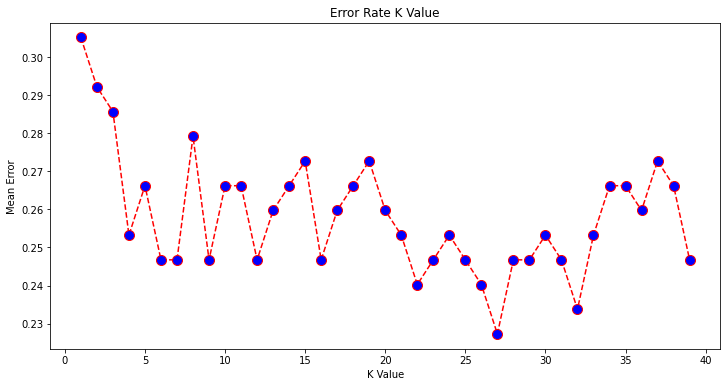

In [9]:
#plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')